In [1]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
init_printing()

In [2]:
# Differentialgleichungen höherer Ordnung

In [3]:
x = Symbol('x')
y = Function('y')

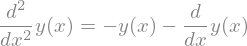

In [4]:
dgl = Eq(y(x).diff(x,2), -y(x).diff(x) - y(x))
dgl

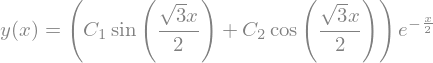

In [5]:
lsg = dsolve(dgl)
lsg

In [6]:
mu = S('mu')
char_poly = dgl.subs(y(x), exp(mu*x)).doit()
char_poly

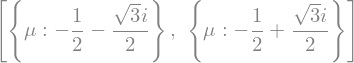

In [7]:
solve(char_poly)

Anfangsbedingungen $y(1)=2$, $y'(1)=3$

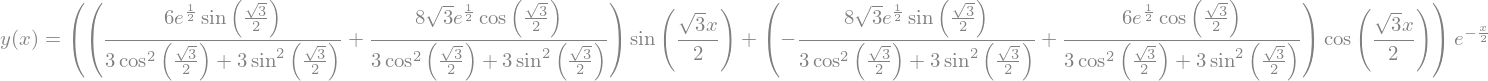

In [8]:
lsg = dsolve(dgl, ics={y(1): 2, y(x).diff(x).subs(x, 1): 3})
lsg

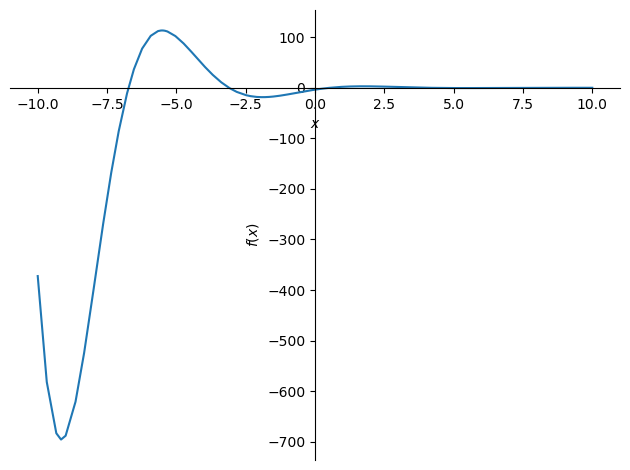

In [9]:
phi = lsg.rhs
plot(phi);

# Besselfunktionen

In [10]:
nu = S('nu')

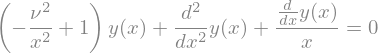

In [11]:
dgl = Eq(y(x).diff(x,2) + y(x).diff(x)/x + (1 - nu**2/x**2)*y(x), 0)
dgl

In [12]:
lsg = dsolve(dgl)
lsg

In [13]:
phi = lsg.rhs
print(phi)

C1*besselj(sqrt(nu**2), x) + C2*bessely(sqrt(nu**2), x)


$J_\nu$: Besselfunktion erster Art der Ordnung $\nu$

$Y_\nu$: Besselfunktion zweiter Art der Ordnung $\nu$, Webersche Funktion

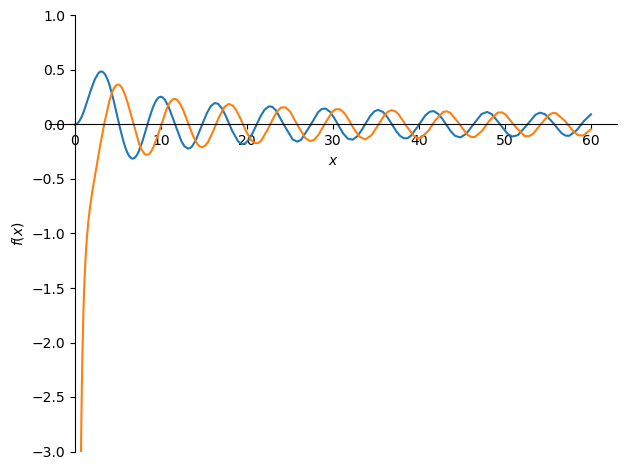

In [14]:
nu_n = 2
plot(besselj(nu_n, x), bessely(nu_n, x), (x, 0, 60), ylim=(-3,1));

Wronskische

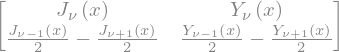

In [15]:
M = Matrix(2,2,[besselj(nu, x), bessely(nu,x), besselj(nu,x).diff(x), bessely(nu,x).diff(x)])
M

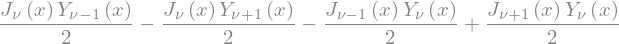

In [16]:
M.det()

In [17]:
W = M.det().simplify()
W

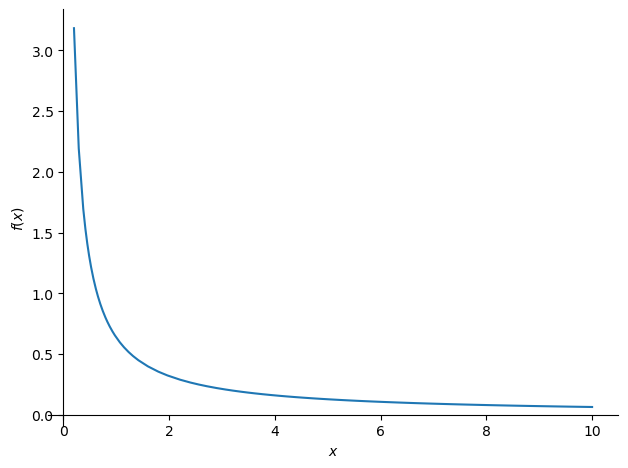

In [18]:
plot(W.subs(nu, 3), (x, .2, 10));

Welche Funktion das ist, sehen wir mit der Reihenentwicklung

Allerdings müssen wir diese Entwicklung selber implementieren, weil es sich nicht um eine Taylorreihe handelt

https://dlmf.nist.gov/10.2#E2

# Pattern matching

In [19]:
ordnung = 4

In [20]:
def Bj_ser(nu, x):
    k = S('k')
    a = (-1)**k * (x/2)**(2*k) / factorial(k) / gamma(nu+1+k)
    res = 0
    for kk in range(ordnung):
        res += a.subs(k, kk)
    return res * (x/2)**nu

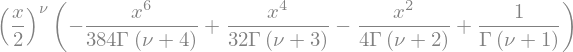

In [21]:
Bj_ser(nu, x)

In [22]:
Bj_ser(-5.5, 2)

In [23]:
besselj(-5.5, 2).n()

In [24]:
mu = Wild('mu')
z = Wild('z')

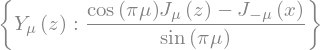

In [25]:
connection_formula =  {bessely(mu,z): (besselj(mu,z)*cos(mu*pi)-besselj(-mu,x))/sin(mu*pi)}
connection_formula

In [26]:
W

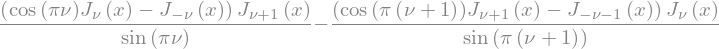

In [27]:
W1 = W.replace(bessely(mu,z), connection_formula[bessely(mu,z)])
W1

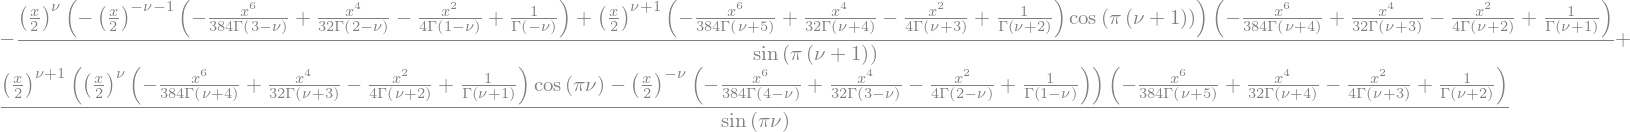

In [28]:
W2 = W1.replace(besselj, Bj_ser)
W2

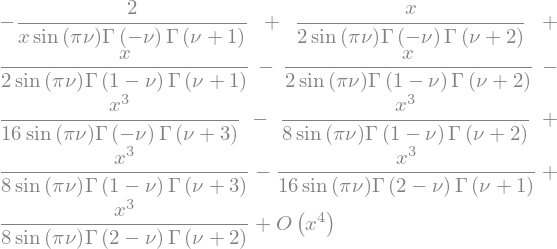

In [29]:
W3 = W2.expand(trig=True) + O(x**ordnung)
W3

In [30]:
simplify(W3.removeO())

Im richtigen Leben müsste man z.B. mit ordnung=8 und ordnung=20 wiederholen

# Gekoppelte Pendel

In [31]:
y = Function('y')
w = Function('w')
t = Symbol('t', positive=True)

In [32]:
a = Rational(1,7)
b = Rational(1,6)

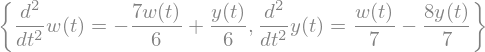

In [33]:
dgl1 = Eq(y(t).diff(t,2), a*w(t) - (1+a)*y(t))
dgl2 = Eq(w(t).diff(t,2), b*y(t) - (1+b)*w(t))
dgs = {dgl1, dgl2}
dgs

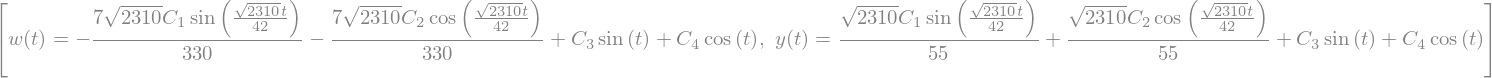

In [34]:
lsg = dsolve(dgs)
lsg

In [35]:
phi_c = lsg[0].rhs
psi_c = lsg[1].rhs

Bestimme reelles Fundamentalsystem

In [36]:
C = symbols('C1, C2, C3, C4')
ersetzungen = []
for j in range(4):
    ers = {C[j]: 1}
    for i in range(4):
        if j != i:
            ers[C[i]] = 0
    ersetzungen.append(ers)

In [37]:
ersetzungen

In [38]:
fus = []
for s in ersetzungen:
    fus.append([phi_c.subs(s), 
                psi_c.subs(s)])

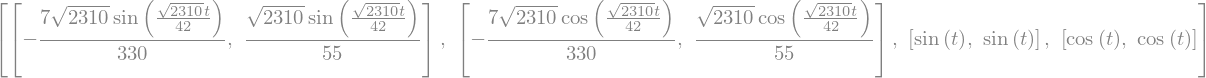

In [39]:
fus

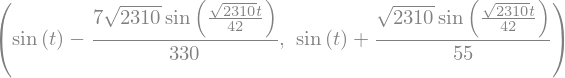

In [40]:
f = fus[0][0] + fus[2][0]
g = fus[0][1] + fus[2][1]
f, g

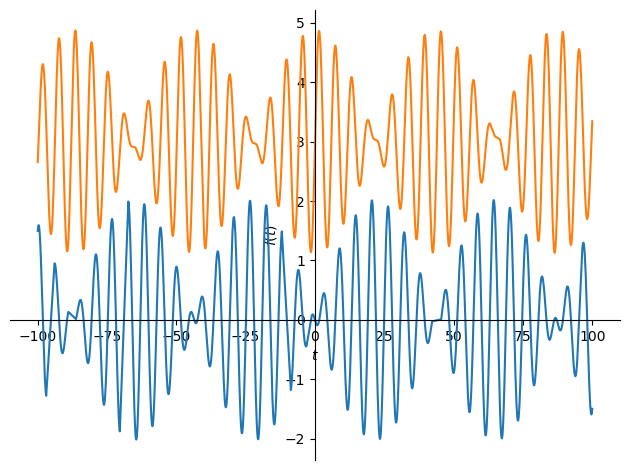

In [41]:
plot(f,g+3, (t,-100,100));